In [1]:
import torch

In [2]:
PATH = "temp/best_model_12.pth.tar"

In [ ]:
chp = torch.load(PATH, weights_only=False, map_location='cpu')
weights = chp['model_state_dict']


tensor([[ 0.0120, -0.0078, -0.0298,  ...,  0.0023,  0.0045, -0.0243],
        [ 0.0247,  0.0091, -0.0370,  ..., -0.0137, -0.0253,  0.0139],
        [-0.0311,  0.0332, -0.0451,  ...,  0.0082, -0.0189, -0.0152],
        ...,
        [-0.0002,  0.0101,  0.0122,  ..., -0.0031, -0.0015,  0.0150],
        [ 0.0195, -0.0095,  0.0332,  ...,  0.0049,  0.0007,  0.0047],
        [-0.0430, -0.0098,  0.0200,  ...,  0.0055, -0.0237, -0.0389]])

In [48]:
weights.get('resblock3.3.bn3.running_mean'), weights.get('resblock3.3.bn3.running_var')

(tensor([ 0.2669, -0.0028,  0.3455,  ...,  0.2262,  0.2116,  0.3508]),
 tensor([0.7167, 0.7000, 0.6794,  ..., 0.6681, 0.5781, 0.6297]))

In [9]:
fc_weights = weights.get("classifier.weight")

fc_model = fc_weights[:, :2048]
fc_hog = fc_weights[:, 2048:]

In [11]:
net_mean, net_std, net_min, net_max = fc_model.mean(), fc_model.std(), fc_model.min(), fc_model.max()
hog_mean, hog_std, hog_min, hog_max = fc_hog.mean(), fc_hog.std(), fc_hog.min(), fc_hog.max()

print(net_max, net_min, hog_max, hog_min)

print(f"Net width: {net_max - net_min:.3f}, Net mean: {net_mean:.3f}, Net std: {net_std:.3f}")
print(f"HOG width: {hog_max - hog_min:.3f}, HOG mean: {hog_mean:.3f}, HOG std: {hog_std:.3f}")


tensor(0.0606) tensor(-0.1561) tensor(0.0443) tensor(-0.0759)
Net width: 0.217, Net mean: -0.008, Net std: 0.021
HOG width: 0.120, HOG mean: -0.002, HOG std: 0.015


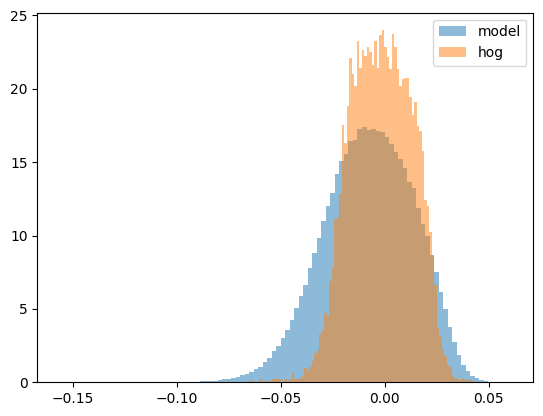

In [51]:
import matplotlib.pyplot as plt

plt.hist(fc_model.flatten(), bins=100, density=True, alpha=0.5, label='model')
plt.hist(fc_hog.flatten(), bins=100, density=True, alpha=0.5, label='hog')
plt.legend()
plt.show()

In [54]:
fc_hog_scaled = (fc_hog - net_min) * (net_max - net_min) + net_min

scaled_hog_min, scaled_hog_max, scaled_hog_mean, scaled_hog_std = fc_hog_scaled.min(), fc_hog_scaled.max(), fc_hog_scaled.mean(), fc_hog_scaled.std()
print(f"Scaled HOG width: {scaled_hog_max - scaled_hog_min:.3f}, Scaled HOG mean: {scaled_hog_mean:.3f}, Scaled HOG std: {scaled_hog_std:.3f}")

Scaled HOG width: 1.098, Scaled HOG mean: 47.420, Scaled HOG std: 0.133


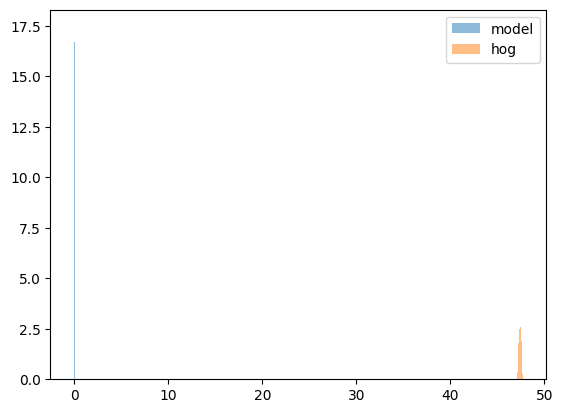

In [55]:
import matplotlib.pyplot as plt

plt.hist(fc_model.flatten(), bins=100, density=True, alpha=0.5, label='model')
plt.hist(fc_hog_scaled.flatten(), bins=100, density=True, alpha=0.5, label='hog')
plt.legend()
plt.show()

In [38]:
bn_mod = torch.nn.BatchNorm1d(2048)
bn_hog = torch.nn.BatchNorm1d(81)

In [39]:
norm_model = bn_mod(fc_weights[:, :2048]).detach()
norm_hog = bn_hog(fc_weights[:, 2048:]).detach()

In [40]:
norm_model.shape, norm_hog.shape

(torch.Size([161, 2048]), torch.Size([161, 81]))

In [41]:
net_mean, net_std, net_min, net_max = norm_model.mean(), norm_model.std(), norm_model.min(), norm_model.max()
hog_mean, hog_std, hog_min, hog_max = norm_hog.mean(), norm_hog.std(), norm_hog.min(), norm_hog.max()

print(net_max, net_min, hog_max, hog_min)

print(f"Net width: {net_max - net_min:.3f}, Net mean: {net_mean:.3f}, Net std: {net_std:.3f}")
print(f"HOG width: {hog_max - hog_min:.3f}, HOG mean: {hog_mean:.3f}, HOG std: {hog_std:.3f}")

tensor(3.3014) tensor(-5.8320) tensor(3.0890) tensor(-4.8607)
Net width: 9.133, Net mean: -0.000, Net std: 0.989
HOG width: 7.950, HOG mean: -0.000, HOG std: 0.977


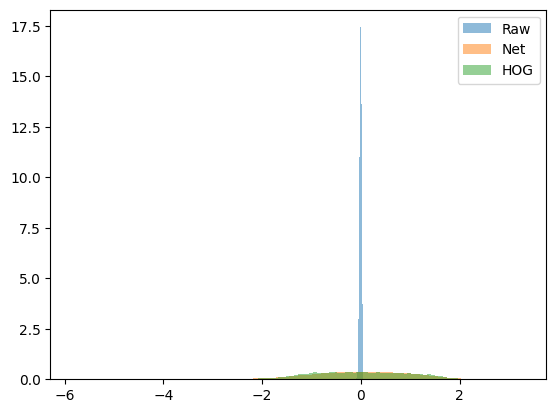

In [46]:
import matplotlib.pyplot as plt

plt.hist(fc_weights[:, :2048].flatten(), density=True, bins=100, alpha=0.5, label='Raw')
plt.hist(norm_model.flatten(), density=True, bins=100, alpha=0.5, label='Net')
plt.hist(norm_hog.flatten(), density=True, bins=100, alpha=0.5, label='HOG')
plt.legend(loc='upper right')
plt.show()